In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6208d9459b401d818a43280ac8a18c4c6d4256cc8737a32158dd70b29814b82f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import scale, OrdinalEncoder, StandardScaler, OneHotEncoder

<ipython-input-4-d0e2a2164f1c>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [5]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Telco_customer_churn.xlsx', index_col=0)
df.head()

Count        Country       State         City  Zip Code  \
CustomerID                                                            
3668-QPYBK      1  United States  California  Los Angeles     90003   
9237-HQITU      1  United States  California  Los Angeles     90005   
9305-CDSKC      1  United States  California  Los Angeles     90006   
7892-POOKP      1  United States  California  Los Angeles     90010   
0280-XJGEX      1  United States  California  Los Angeles     90015   

                          Lat Long   Latitude   Longitude  Gender  \
CustomerID                                                          
3668-QPYBK  33.964131, -118.272783  33.964131 -118.272783    Male   
9237-HQITU   34.059281, -118.30742  34.059281 -118.307420  Female   
9305-CDSKC  34.048013, -118.293953  34.048013 -118.293953  Female   
7892-POOKP  34.062125, -118.315709  34.062125 -118.315709  Female   
0280-XJGEX  34.039224, -118.266293  34.039224 -118.266293    Male   

           Senior Citizen Partner Dependents  Tenure Months Phone Service  \
CustomerID                                                                  
3668-QPYBK             No      No         No              2           Yes   
9237-HQITU             No      No        Yes              2           Yes   
9305-CDSKC             No      No        Yes              8           Yes   
7892-POOKP             No     Yes        Yes             28           Yes   
0280-XJGEX             No      No        Yes             49           Yes   

           Multiple Lines Internet Service Online Security Online Backup  \
CustomerID                                                                 
3668-QPYBK             No              DSL             Yes           Yes   
9237-HQITU             No      Fiber optic              No            No   
9305-CDSKC            Yes      Fiber optic              No            No   
7892-POOKP            Yes      Fiber optic              No            No   
0280-XJGEX            Yes      Fiber optic              No           Yes   

           Device Protection Tech Support Streaming TV Streaming Movies  \
CustomerID                                                                
3668-QPYBK                No           No           No               No   
9237-HQITU                No           No           No               No   
9305-CDSKC               Yes           No          Yes              Yes   
7892-POOKP               Yes          Yes          Yes              Yes   
0280-XJGEX               Yes           No          Yes              Yes   

                  Contract Paperless Billing             Payment Method  \
CustomerID                                                                
3668-QPYBK  Month-to-month               Yes               Mailed check   
9237-HQITU  Month-to-month               Yes           Electronic check   
9305-CDSKC  Month-to-month               Yes           Electronic check   
7892-POOKP  Month-to-month               Yes           Electronic check   
0280-XJGEX  Month-to-month               Yes  Bank transfer (automatic)   

            Monthly Charges Total Charges Churn Label  Churn Value  \
CustomerID                                                           
3668-QPYBK            53.85        108.15         Yes            1   
9237-HQITU            70.70        151.65         Yes            1   
9305-CDSKC            99.65         820.5         Yes            1   
7892-POOKP           104.80       3046.05         Yes            1   
0280-XJGEX           103.70        5036.3         Yes            1   

            Churn Score  CLTV                   Churn Reason  
CustomerID                                                    
3668-QPYBK           86  3239   Competitor made better offer  
9237-HQITU           67  2701                          Moved  
9305-CDSKC           86  5372                          Moved  
7892-POOKP           84  5003                          Moved  
0280-XJGEX           89  5340  Compe

In [7]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
"""
    Verificando valores distintos para saber se há alguma incoerência com os dados, isto é,
    se todos os não-churns realmente não apresentam uma razão para ser churn.
"""
df[df['Churn Reason'].isna()]['Churn Label'].value_counts()

No    5174
Name: Churn Label, dtype: int64

In [10]:
df.filter(like='Churn').head()

Churn Label  Churn Value  Churn Score  \
CustomerID                                         
3668-QPYBK         Yes            1           86   
9237-HQITU         Yes            1           67   
9305-CDSKC         Yes            1           86   
7892-POOKP         Yes            1           84   
0280-XJGEX         Yes            1           89   

                             Churn Reason  
CustomerID                                 
3668-QPYBK   Competitor made better offer  
9237-HQITU                          Moved  
9305-CDSKC                          Moved  
7892-POOKP                          Moved  
0280-XJGEX  Competitor had better devices

In [11]:
"""
    Remoção de variáveis que já contém o resultado.
"""
df.drop(columns=['Churn Label', 'Churn Score', 'Churn Reason'], inplace=True)

In [12]:
"""
    Remoção de colunas com variáveis constantes.
"""
constant_cols = df.columns[df.nunique() == 1]
df.drop(columns=constant_cols, inplace=True)
df.columns

Index(['City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'CLTV'],
      dtype='object')

In [13]:
geographic_cols2drop = ['City', 'Zip Code', 'Lat Long']
df.drop(columns=geographic_cols2drop, inplace=True)

In [14]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           7043 non-null   float64
 1   Longitude          7043 non-null   float64
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract      

### O tipo object pode ter tipos mesclados dentro dele, causando dificuldades na hora de transformá-lo para um único tipo de dados.

In [15]:
# Exemplo abaixo:
df['Total Charges'].map(lambda x: type(x)).unique()

array([<class 'float'>, <class 'int'>, <class 'str'>], dtype=object)

In [16]:
(df[df['Total Charges'].map(lambda x: isinstance(x, str))]['Total Charges']).str.strip().iloc[0]

''

In [17]:
(df[df['Total Charges'].map(lambda x: isinstance(x, int))][['Total Charges']]).astype(float)

Total Charges
CustomerID               
3376-BMGFE          273.0
2472-OVKUP          531.0
5583-SXDAG           70.0
1343-EHPYB         6603.0
4572-DVCGN          846.0
...                   ...
6211-WHMYA         2751.0
3454-JFUBC         1396.0
1024-KPRBB         3342.0
9710-NJERN          826.0
9837-FWLCH          239.0

[324 rows x 1 columns]

Nas 3 linhas acima foi verificado os tipos que estão numa mesma coluna.
Depois foi feito uma visualização desses dados (até pra verificar se o código ta certo)

Em seguida na linha que se segue abaixo foram criadas as variáveis que
referenciam os índices dos itens que são instâncias 'int' e dos itens
que são instâncias 'str'. Logo depois, é feita a transformação dos dados
em float.

In [18]:
str_idx = df['Total Charges'].map(lambda x: isinstance(x, str))
int_idx = df['Total Charges'].map(lambda x: isinstance(x, int))

df.loc[int_idx, 'Total Charges'] = df.loc[int_idx, 'Total Charges'].astype(float)
df.loc[str_idx, 'Total Charges'] = 0

In [19]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [20]:
df.head()

Latitude   Longitude  Gender Senior Citizen Partner Dependents  \
CustomerID                                                                    
3668-QPYBK  33.964131 -118.272783    Male             No      No         No   
9237-HQITU  34.059281 -118.307420  Female             No      No        Yes   
9305-CDSKC  34.048013 -118.293953  Female             No      No        Yes   
7892-POOKP  34.062125 -118.315709  Female             No     Yes        Yes   
0280-XJGEX  34.039224 -118.266293    Male             No      No        Yes   

            Tenure Months Phone Service Multiple Lines Internet Service  \
CustomerID                                                                
3668-QPYBK              2           Yes             No              DSL   
9237-HQITU              2           Yes             No      Fiber optic   
9305-CDSKC              8           Yes            Yes      Fiber optic   
7892-POOKP             28           Yes            Yes      Fiber optic   
0280-XJGEX             49           Yes            Yes      Fiber optic   

           Online Security Online Backup Device Protection Tech Support  \
CustomerID                                                                
3668-QPYBK             Yes           Yes                No           No   
9237-HQITU              No            No                No           No   
9305-CDSKC              No            No               Yes           No   
7892-POOKP              No            No               Yes          Yes   
0280-XJGEX              No           Yes               Yes           No   

           Streaming TV Streaming Movies        Contract Paperless Billing  \
CustomerID                                                                   
3668-QPYBK           No               No  Month-to-month               Yes   
9237-HQITU           No               No  Month-to-month               Yes   
9305-CDSKC          Yes              Yes  Month-to-month               Yes   
7892-POOKP          Yes              Yes  Month-to-month               Yes   
0280-XJGEX          Yes              Yes  Month-to-month               Yes   

                       Payment Method  Monthly Charges  Total Charges  \
CustomerID                                                              
3668-QPYBK               Mailed check            53.85         108.15   
9237-HQITU           Electronic check            70.70         151.65   
9305-CDSKC           Electronic check            99.65         820.50   
7892-POOKP           Electronic check           104.80        3046.05   
0280-XJGEX  Bank transfer (automatic)           103.70        5036.30   

            Churn Value  CLTV  
CustomerID                     
3668-QPYBK            1  3239  
9237-HQITU            1  2701  
9305-CDSKC            1  5372  
7892-POOKP            1  5003  
0280-XJGEX            1  5340

In [21]:
numeric_cols = df.select_dtypes('number').columns

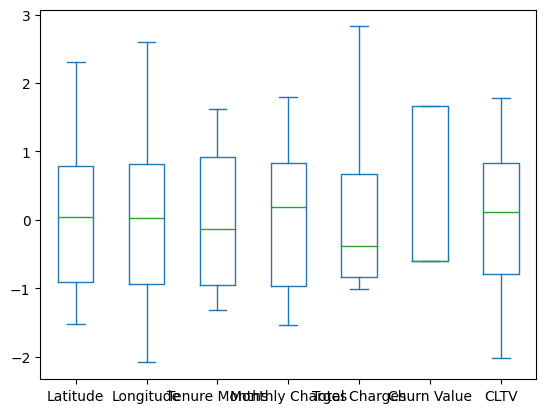

In [22]:
df[numeric_cols].apply(scale).plot.box();

In [23]:
df_features = df.drop(columns=['Churn Value'])
target = df['Churn Value']

Novamente definindo o que são as colunas numéricas e categóricas

In [24]:
numeric_cols = df_features.select_dtypes('number').columns
categoric_cols = df_features.select_dtypes(exclude='number').columns

In [25]:
df_features

Latitude   Longitude  Gender Senior Citizen Partner Dependents  \
CustomerID                                                                    
3668-QPYBK  33.964131 -118.272783    Male             No      No         No   
9237-HQITU  34.059281 -118.307420  Female             No      No        Yes   
9305-CDSKC  34.048013 -118.293953  Female             No      No        Yes   
7892-POOKP  34.062125 -118.315709  Female             No     Yes        Yes   
0280-XJGEX  34.039224 -118.266293    Male             No      No        Yes   
...               ...         ...     ...            ...     ...        ...   
2569-WGERO  34.341737 -116.539416  Female             No      No         No   
6840-RESVB  34.667815 -117.536183    Male             No     Yes        Yes   
2234-XADUH  34.559882 -115.637164  Female             No     Yes        Yes   
4801-JZAZL  34.167800 -116.864330  Female             No     Yes        Yes   
3186-AJIEK  34.424926 -117.184503    Male             No      No         No   

            Tenure Months Phone Service    Multiple Lines Internet Service  \
CustomerID                                                                   
3668-QPYBK              2           Yes                No              DSL   
9237-HQITU              2           Yes                No      Fiber optic   
9305-CDSKC              8           Yes               Yes      Fiber optic   
7892-POOKP             28           Yes               Yes      Fiber optic   
0280-XJGEX             49           Yes               Yes      Fiber optic   
...                   ...           ...               ...              ...   
2569-WGERO             72           Yes                No               No   
6840-RESVB             24           Yes               Yes              DSL   
2234-XADUH             72           Yes               Yes      Fiber optic   
4801-JZAZL             11            No  No phone service              DSL   
3186-AJIEK             66           Yes                No      Fiber optic   

                Online Security        Online Backup    Device Protection  \
CustomerID                                                                  
3668-QPYBK                  Yes                  Yes                   No   
9237-HQITU                   No                   No                   No   
9305-CDSKC                   No                   No                  Yes   
7892-POOKP                   No                   No                  Yes   
0280-XJGEX                   No                  Yes                  Yes   
...                         ...                  ...                  ...   
2569-WGERO  No internet service  No internet service  No internet service   
6840-RESVB                  Yes                   No                  Yes   
2234-XADUH                   No                  Yes                  Yes   
4801-JZAZL                  Yes                   No                   No   
3186-AJIEK                  Yes                   No                  Yes   

                   Tech Support         Streaming TV     Streaming Movies  \
CustomerID                                                                  
3668-QPYBK                   No                   No                   No   
9237-HQITU                   No                   No                   No   
9305-CDSKC                   No                  Yes                  Yes   
7892-POOKP                  Yes                  Yes                  Yes   
0280-XJGEX                   No                  Yes                  Yes   
...                         ...                  ...                  ...   
2569-WGERO  No internet service  No internet service  No internet service   
6840-RESVB                  Yes                  Yes                  Yes   
2234-XADUH                   No                  Yes                  Yes   
4801-JZAZL                   No                   No                   No   
3186-AJIEK                  Yes             

Não precisaria fazer transformação neste caso, pois não há outliers

In [26]:
preprocessing = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(), categoric_cols)
])

preprocessing

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'CLTV'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object'))])

In [27]:
preprocessing.fit(df_features)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'CLTV'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object'))])

In [28]:
preprocessing.transform(df_features)
preprocessing.get_feature_names_out()

array(['num__Latitude', 'num__Longitude', 'num__Tenure Months',
       'num__Monthly Charges', 'num__Total Charges', 'num__CLTV',
       'cat__Gender_Female', 'cat__Gender_Male', 'cat__Senior Citizen_No',
       'cat__Senior Citizen_Yes', 'cat__Partner_No', 'cat__Partner_Yes',
       'cat__Dependents_No', 'cat__Dependents_Yes',
       'cat__Phone Service_No', 'cat__Phone Service_Yes',
       'cat__Multiple Lines_No', 'cat__Multiple Lines_No phone service',
       'cat__Multiple Lines_Yes', 'cat__Internet Service_DSL',
       'cat__Internet Service_Fiber optic', 'cat__Internet Service_No',
       'cat__Online Security_No',
       'cat__Online Security_No internet service',
       'cat__Online Security_Yes', 'cat__Online Backup_No',
       'cat__Online Backup_No internet service', 'cat__Online Backup_Yes',
       'cat__Device Protection_No',
       'cat__Device Protection_No internet service',
       'cat__Device Protection_Yes', 'cat__Tech Support_No',
       'cat__Tech Support_No inter

In [29]:
pd.DataFrame(
    data=preprocessing.transform(df_features),
    columns=preprocessing.get_feature_names_out()
)

num__Latitude  num__Longitude  num__Tenure Months  num__Monthly Charges  \
0         -0.944111        0.707268           -1.236724             -0.362660   
1         -0.905362        0.691215           -1.236724              0.197365   
2         -0.909951        0.697457           -0.992402              1.159546   
3         -0.904204        0.687374           -0.177995              1.330711   
4         -0.913530        0.710276            0.677133              1.294151   
...             ...             ...                 ...                   ...   
7038      -0.790334        1.510595            1.613701             -1.449476   
7039      -0.657542        1.048644           -0.340876              0.665992   
7040      -0.701497        1.928742            1.613701              1.277533   
7041      -0.861169        1.360014           -0.870241             -1.168632   
7042      -0.756456        1.211630            1.369379              1.358961   

      num__Total Charges  num__CLTV  cat__Gender_Female  cat__Gender_Male  \
0              -0.958066  -0.981675                 0.0               1.0   
1              -0.938874  -1.436462                 1.0               0.0   
2              -0.643789   0.821409                 1.0               0.0   
3               0.338085   0.509483                 1.0               0.0   
4               1.216150   0.794358                 0.0               1.0   
...                  ...        ...                 ...               ...   
7038           -0.379565   0.765617                 1.0               0.0   
7039           -0.127605  -1.910691                 0.0               1.0   
7040            2.242606   0.980330                 1.0               0.0   
7041           -0.852932  -1.358692                 1.0               0.0   
7042            2.013897   0.588943                 0.0               1.0   

      cat__Senior Citizen_No  cat__Senior Citizen_Yes  cat__Partner_No  \
0                        1.0                      0.0              1.0   
1                        1.0                      0.0              1.0   
2                        1.0                      0.0              1.0   
3                        1.0                      0.0              0.0   
4                        1.0                      0.0              1.0   
...                      ...                      ...              ...   
7038                     1.0                      0.0              1.0   
7039                     1.0                      0.0              0.0   
7040                     1.0                      0.0              0.0   
7041                     1.0                      0.0              0.0   
7042                     1.0                      0.0              1.0   

      cat__Partner_Yes  cat__Dependents_No  cat__Dependents_Yes  \
0                  0.0                 1.0                  0.0   
1                  0.0                 0.0                  1.0   
2                  0.0                 0.0                  1.0   
3                  1.0                 0.0                  1.0   
4                  0.0                 0.0                  1.0   
...                ...                 ...                  ...   
7038               0.0                 1.0                  0.0   
7039               1.0                 0.0                  1.0   
7040               1.0                 0.0                  1.0   
7041               1.0                 0.0                  1.0   
7042               0.0                 1.0                  0.0   

      cat__Phone Service_No  cat__Phone Service_Yes  cat__Multiple Lines_No  \
0                       0.0                     1.0                     1.0   
1                       0.0                     1.0                     1.0   
2                       0.0                     1.0                     0.0   
3                       0.0                     1.0                     0.0   
4                  

Aqui usei Ordinal Encoder apenas para ver a correlação das features com Mutual Information.

In [31]:
df_mi = df.copy()

encoder = OrdinalEncoder()
df[categoric_cols] = encoder.fit_transform(df[categoric_cols]).astype(int)
df_mi.head()

Latitude   Longitude  Gender Senior Citizen Partner Dependents  \
CustomerID                                                                    
3668-QPYBK  33.964131 -118.272783    Male             No      No         No   
9237-HQITU  34.059281 -118.307420  Female             No      No        Yes   
9305-CDSKC  34.048013 -118.293953  Female             No      No        Yes   
7892-POOKP  34.062125 -118.315709  Female             No     Yes        Yes   
0280-XJGEX  34.039224 -118.266293    Male             No      No        Yes   

            Tenure Months Phone Service Multiple Lines Internet Service  \
CustomerID                                                                
3668-QPYBK              2           Yes             No              DSL   
9237-HQITU              2           Yes             No      Fiber optic   
9305-CDSKC              8           Yes            Yes      Fiber optic   
7892-POOKP             28           Yes            Yes      Fiber optic   
0280-XJGEX             49           Yes            Yes      Fiber optic   

           Online Security Online Backup Device Protection Tech Support  \
CustomerID                                                                
3668-QPYBK             Yes           Yes                No           No   
9237-HQITU              No            No                No           No   
9305-CDSKC              No            No               Yes           No   
7892-POOKP              No            No               Yes          Yes   
0280-XJGEX              No           Yes               Yes           No   

           Streaming TV Streaming Movies        Contract Paperless Billing  \
CustomerID                                                                   
3668-QPYBK           No               No  Month-to-month               Yes   
9237-HQITU           No               No  Month-to-month               Yes   
9305-CDSKC          Yes              Yes  Month-to-month               Yes   
7892-POOKP          Yes              Yes  Month-to-month               Yes   
0280-XJGEX          Yes              Yes  Month-to-month               Yes   

                       Payment Method  Monthly Charges  Total Charges  \
CustomerID                                                              
3668-QPYBK               Mailed check            53.85         108.15   
9237-HQITU           Electronic check            70.70         151.65   
9305-CDSKC           Electronic check            99.65         820.50   
7892-POOKP           Electronic check           104.80        3046.05   
0280-XJGEX  Bank transfer (automatic)           103.70        5036.30   

            Churn Value  CLTV  
CustomerID                     
3668-QPYBK            1  3239  
9237-HQITU            1  2701  
9305-CDSKC            1  5372  
7892-POOKP            1  5003  
0280-XJGEX            1  5340

In [32]:
df_features = df_mi.drop(columns=['Churn Value'])
target = df_mi['Churn Value']

In [33]:
discrete_cols = df_mi.dtypes==int

mi_scores = mutual_info_classif(X=df, y=target, discrete_features=discrete_cols)
mi_scores

array([0.00309602, 0.01247663, 0.        , 0.01075922, 0.00933037,
       0.03724262, 0.07930907, 0.        , 0.00696119, 0.05631827,
       0.06050412, 0.04555768, 0.04623517, 0.06212854, 0.03020757,
       0.02803611, 0.09233609, 0.01895188, 0.04485945, 0.0467954 ,
       0.04264724, 0.57859903, 0.29668867])

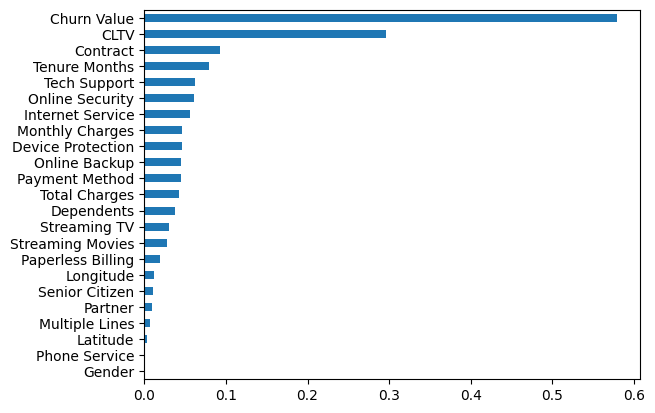

In [34]:
pd.Series(mi_scores, index=df.columns).sort_values(ascending=True).plot.barh();